In [34]:
import sub

In [35]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch
import torchvision.transforms.functional as F


# names = {0: "ship", 1: "automobile", 2: "dog", 3: "frog", 4: "horse"}
# names = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}
names = {0: "airplane", 1: "automobile", 2: "bird", 3: "deer", 4: "frog", 5: "horse", 6: "ship", 7: "truck"}

def show(imgs, figsize=None):
    if not isinstance(imgs, list):
        imgs = [imgs]

    if figsize is not None:
        fig, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=figsize)
    else:
        fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)

    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [36]:
from torchvision import transforms
import importlib
importlib.reload(sub)

# it make take a little while to build the dataset 
example_dataset = sub.build_dataset(["cifar10_batches/data_batch_1"], transform=transforms.ToTensor())
print(example_dataset.data[0])

[ 59  43  50 ... 140  84  72]


An example of a deer


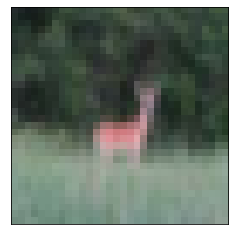

In [37]:
import random

image, label = example_dataset[random.randint(0, len(example_dataset)-1)]
print("An example of a", names[label])
show(image)

In [38]:
loader_params = {"batch_size": 4, "shuffle": True}
example_dataloader = sub.build_dataloader(example_dataset, loader_params=loader_params)

image batch shape:  torch.Size([4, 3, 32, 32])
label batch shape:  torch.Size([4])


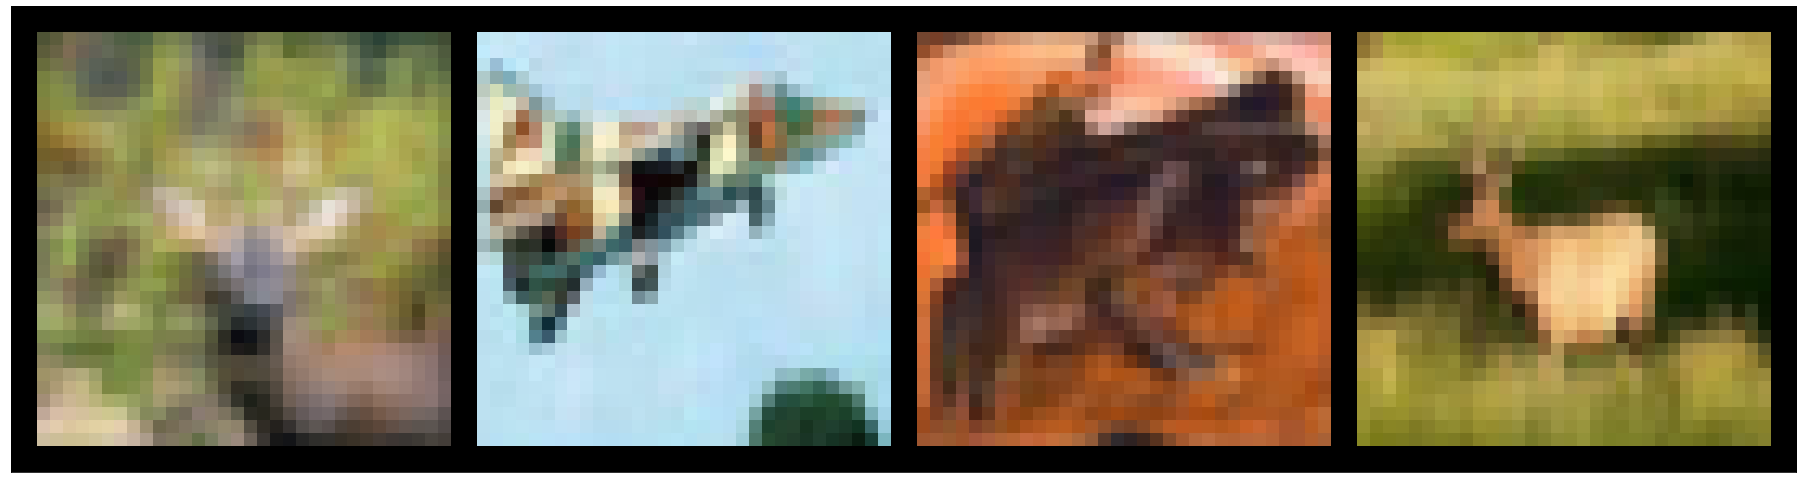

In [39]:
from torchvision.utils import make_grid

plt.rcParams["savefig.bbox"] = 'tight'

image_batch, label_batch = next(iter(example_dataloader))
print("image batch shape: ", image_batch.shape)
print("label batch shape: ", label_batch.shape)
show(make_grid([image_batch[i, :, :, :] for i in range(image_batch.shape[0])], nrows=4), figsize=(32, 32))

In [40]:
sub.run_model()

FinetuneNet(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac